# **Importing and Loading the Dataset**

In [1]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

#Data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#For modeling
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score



df=pd.read_csv("/content/drive/MyDrive/Churn_Modelling.csv")

In [3]:
tf.__version__

'2.8.2'

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


1    7055
0    2945
Name: HasCrCard, dtype: int64

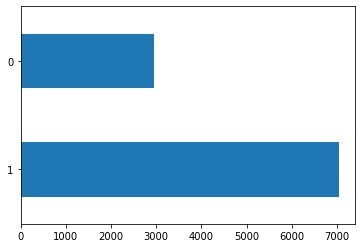

In [7]:
df.HasCrCard.value_counts().plot(kind='barh');
df.HasCrCard.value_counts()

# **Univariate Analysis**

**Histograms**

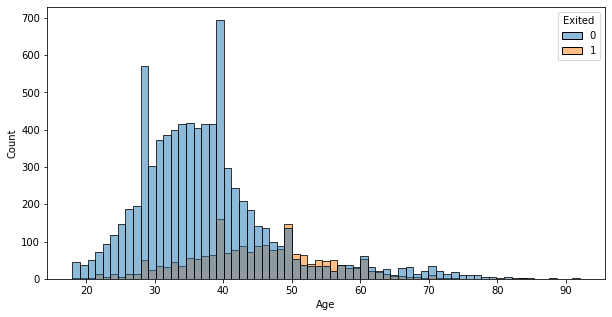

In [8]:
fig= plt.figure(figsize=(10,5))
sns.histplot(x="Age",hue="Exited",data=df);

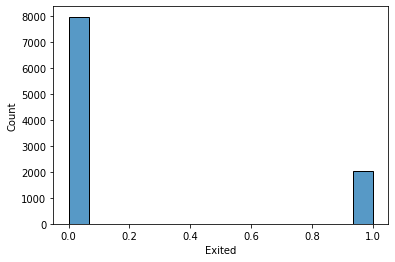

In [11]:
sns.histplot(data=df, x=df['Exited'])

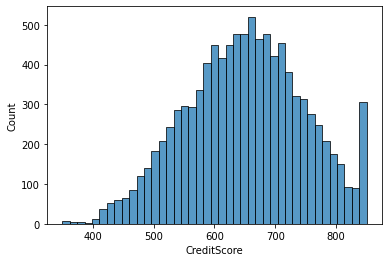

In [14]:
sns.histplot(data=df, x=df['CreditScore'])

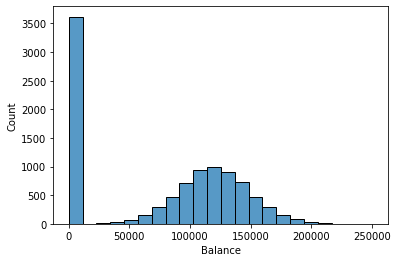

In [15]:
sns.histplot(data=df, x=df['Balance'])

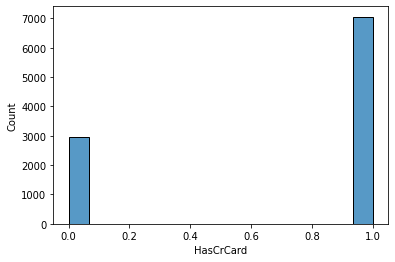

In [20]:
sns.histplot(data=df, x=df['HasCrCard'])

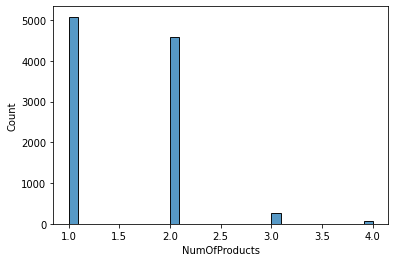

In [21]:
sns.histplot(data=df, x=df['NumOfProducts'])

# **Bi-variate Analysis**

In [22]:
sns.set(rc={'figure.figsize':(7,8)})
sns.set(font_scale=1)

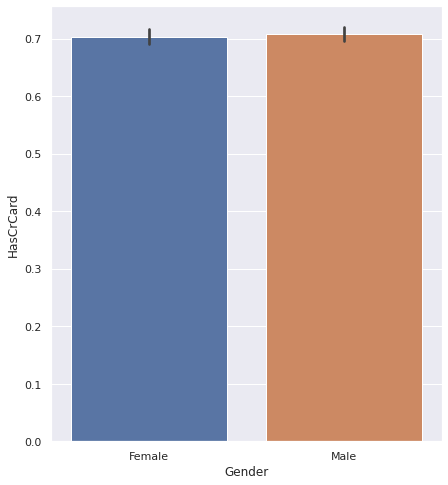

In [24]:
sns.barplot(x=df['Gender'], y=df['HasCrCard'])

<function matplotlib.pyplot.show(*args, **kw)>

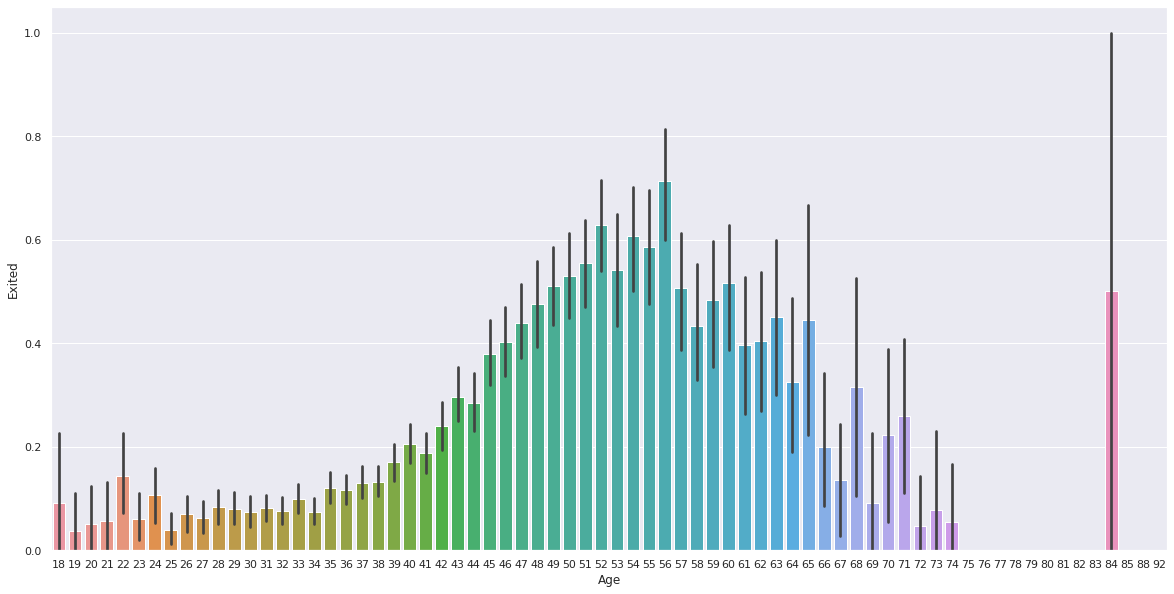

In [26]:
plt.figure(figsize=(20,10))
sns.barplot(x=df['Age'],y=df['Exited'])
plt.show

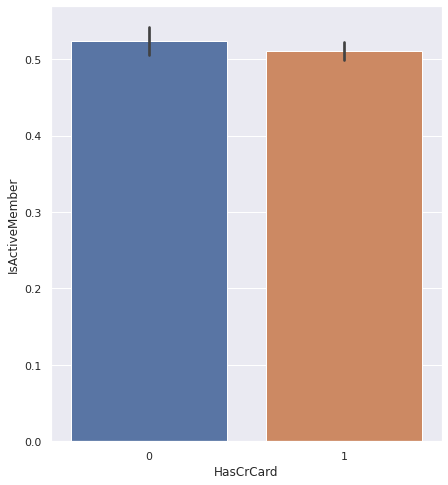

In [27]:
sns.barplot(x=df['HasCrCard'], y=df['IsActiveMember'])

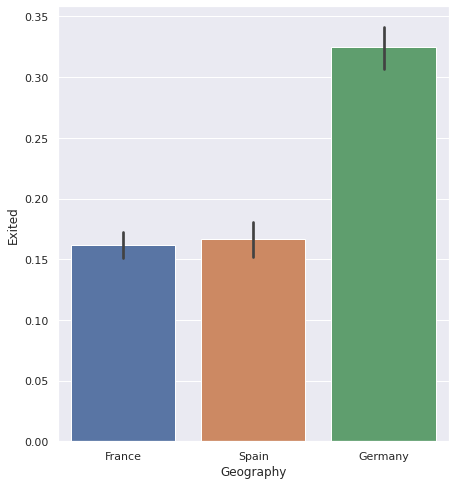

In [29]:
sns.barplot(x=df['Geography'], y=df['Exited'])

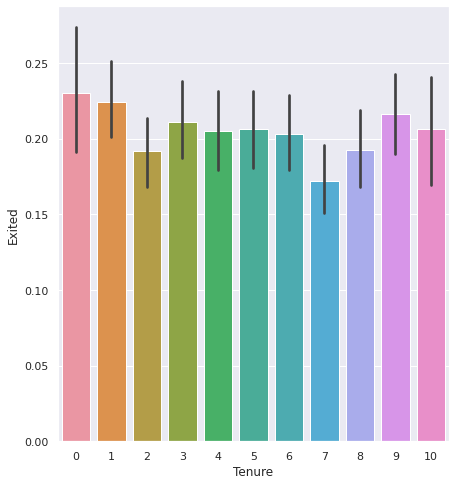

In [31]:
sns.barplot(x=df['Tenure'], y=df['Exited'])

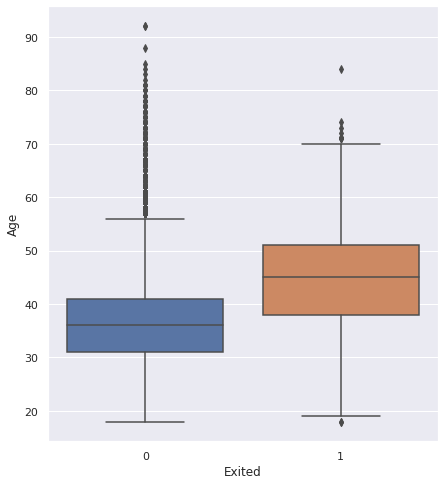

In [32]:

sns.boxplot(x=df["Exited"], y=df["Age"])

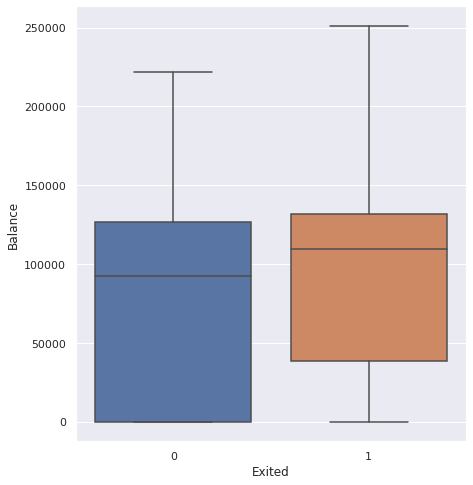

In [33]:
sns.boxplot(x=df.Exited,y=df.Balance)

# **Multivariate Analysis**

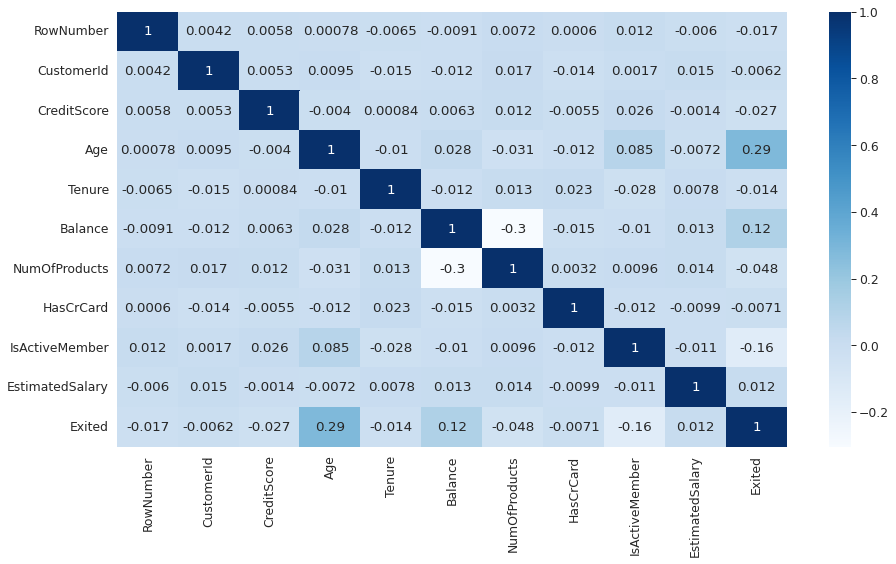

In [34]:
plt.figure(figsize=(15,8))
sns.set_context('paper',font_scale=1.4)

crash_matrix=df.corr()

sns.heatmap(crash_matrix,annot=True,cmap='Blues')

# **Descriptive Statistics**

In [35]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# **Handling Missing Values**

In [39]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# **Finding and Replacing Outliers**

## **Skew value should between -1 and 1 for a normal distribution**

In [41]:
print("Credit Score :",df["CreditScore"].skew())
print("Age :",df["Age"].skew())
print("Tenure :",df["Tenure"].skew())
print("Balance :",df["Balance"].skew())
print("No of Products :",df["NumOfProducts"].skew())
print("Estimated Salary :",df["EstimatedSalary"].skew())

Credit Score : -0.07160660820092675
Age : 1.0113202630234552
Tenure : 0.01099145797717904
Balance : -0.14110871094154384
No of Products : 0.7455678882823168
Estimated Salary : 0.0020853576615585162


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


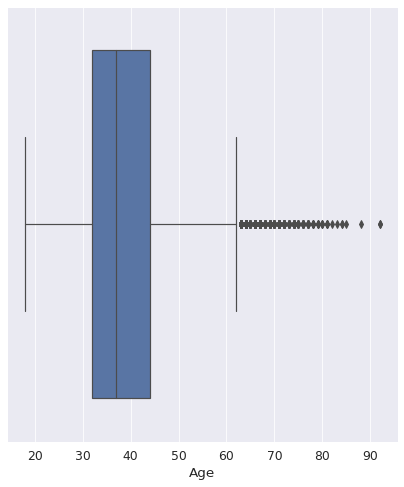

In [43]:
sns.boxplot(df["Age"])

# **Interquartile Range IQR**

In [44]:
q1 = df["Age"].quantile(0.25)
q2 = df["Age"].quantile(0.75)

# **Flooring and capping**

In [45]:
iqr = q2 - q1
whisker_width = 1.5
lower_whisker = q1 -(whisker_width*iqr)
upper_whisker = q2 + (whisker_width*iqr)
df["Age"]=np.where(df["Age"]>upper_whisker,upper_whisker,np.where(df["Age"]<lower_whisker,lower_whisker,df["Age"]))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


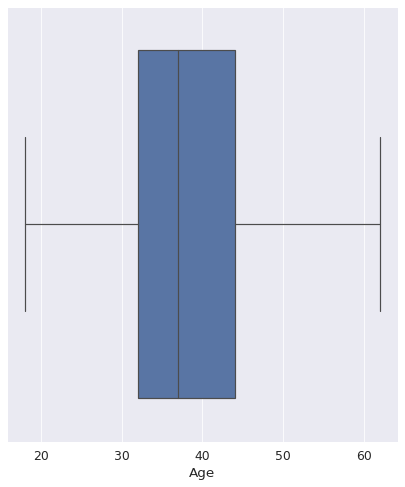

In [47]:
sns.boxplot(df["Age"])

# **Encoding of Categorical Values**

In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
enc = LabelEncoder()

In [50]:
df["Geography"] = enc.fit_transform(df["Geography"])

In [51]:
df["Gender"] = enc.fit_transform(df["Gender"])

In [52]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43.0,2,125510.82,1,1,1,79084.10,0


# **Splitting Data into Dependent and Independent Variables**

In [53]:
Independent_Vars = df.drop(["Exited"],axis=1)
Depenendent_Vars = df["Exited"]

In [54]:

Independent_Vars.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,Hargrave,619,0,0,42.0,2,0.00,1,1,1,101348.88
1,2,15647311,Hill,608,2,0,41.0,1,83807.86,1,0,1,112542.58
2,3,15619304,Onio,502,0,0,42.0,8,159660.80,3,1,0,113931.57
3,4,15701354,Boni,699,0,0,39.0,1,0.00,2,0,0,93826.63
4,5,15737888,Mitchell,850,2,0,43.0,2,125510.82,1,1,1,79084.10


In [55]:
Depenendent_Vars.head()


0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

# **Scale Independent Values**

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_data = df.drop(["CustomerId","Surname","RowNumber", "Exited"], axis=1)
numerical_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42.0,2,0.00,1,1,1,101348.88
1,608,2,0,41.0,1,83807.86,1,0,1,112542.58
2,502,0,0,42.0,8,159660.80,3,1,0,113931.57
3,699,0,0,39.0,1,0.00,2,0,0,93826.63
4,850,2,0,43.0,2,125510.82,1,1,1,79084.10


In [59]:
numerical_data[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']] 

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42.0,2,0.00,1,1,1,101348.88
1,608,2,0,41.0,1,83807.86,1,0,1,112542.58
2,502,0,0,42.0,8,159660.80,3,1,0,113931.57
3,699,0,0,39.0,1,0.00,2,0,0,93826.63
4,850,2,0,43.0,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39.0,5,0.00,2,1,0,96270.64
9996,516,0,1,35.0,10,57369.61,1,1,1,101699.77
9997,709,0,0,36.0,7,0.00,1,0,1,42085.58
9998,772,1,1,42.0,3,75075.31,2,1,0,92888.52


# **Splitting Data to Test and Train**

In [60]:
from sklearn.model_selection import train_test_split
final_dataset = pd.concat([numerical_data,Depenendent_Vars],axis=1)
final_dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42.0,2,0.00,1,1,1,101348.88,1
1,608,2,0,41.0,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42.0,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39.0,1,0.00,2,0,0,93826.63,0
4,850,2,0,43.0,2,125510.82,1,1,1,79084.10,0


In [62]:
X_train, X_test, y_train, y_test = train_test_split(numerical_data, Depenendent_Vars, test_size=0.33, random_state=42)
X_train.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
8371,813,1,0,29.0,5,106059.40,1,0,0,187976.88
5027,681,1,1,37.0,8,73179.34,2,1,1,25292.53
9234,642,1,1,49.0,4,120688.61,1,1,0,24770.22
3944,612,0,0,31.0,8,117989.76,1,1,1,54129.86
6862,586,0,1,33.0,9,0.00,1,1,0,6975.02


In [63]:
X_test.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6252,596,1,1,32.0,3,96709.07,2,0,0,41788.37
4684,623,0,1,43.0,1,0.00,2,1,1,146379.30
1731,601,2,0,44.0,4,0.00,2,1,0,58561.31
4742,506,1,1,59.0,8,119152.10,2,1,1,170679.74
4521,560,2,0,27.0,7,124995.98,1,1,1,114669.79


In [64]:
y_test.head()

6252    0
4684    0
1731    0
4742    0
4521    0
Name: Exited, dtype: int64

In [65]:
y_train.head()

8371    1
5027    0
9234    1
3944    0
6862    0
Name: Exited, dtype: int64